In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("train_data.csv")

In [3]:
df2 = df.copy()

## Data Description

* Case_id - Case_ID registered in Hospital
* Hospital_code - Unique code for the Hospital
* Hospital_type_code - Unique code for the type of Hospital
* City_Code_Hospital - City Code of the Hospital
* Hospital_region_code - Region Code of the Hospital
* Available Extra Rooms in Hospital - Number of Extra rooms available in the Hospital
* Department - Department overlooking the case
* Ward_Type - Code for the Ward type
* Ward_Facility_Code - Code for the Ward Facility
* Bed Grade - Condition of Bed in the Ward
* patientid - Unique Patient Id
* City_Code_Patient - City Code for the patient
* Type of Admission - Admission Type registered by the Hospital
* Severity of Illness - Severity of the illness recorded at the time of admission
* Visitors with Patient - Number of Visitors with the patient
* Age - Age of the patient
* Admission_Deposit - Deposit at the Admission Time
* Stay - Stay Days by the patient


**Problem Statement**
Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.
This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.
Suppose you have been hired as Data Scientist of HealthMan – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner.
The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.  
Source : [Kaggle_Link_Data](https://www.kaggle.com/nehaprabhavalkar/av-healthcare-analytics-ii)

In [4]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
df["Stay"].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [7]:
df["Stay"].replace("More than 100 Days", "100+", inplace = True)

In [8]:
k = df["Stay"].value_counts()

In [9]:
import seaborn as sns
from matplotlib import pyplot

<AxesSubplot:xlabel='Stay', ylabel='Count'>

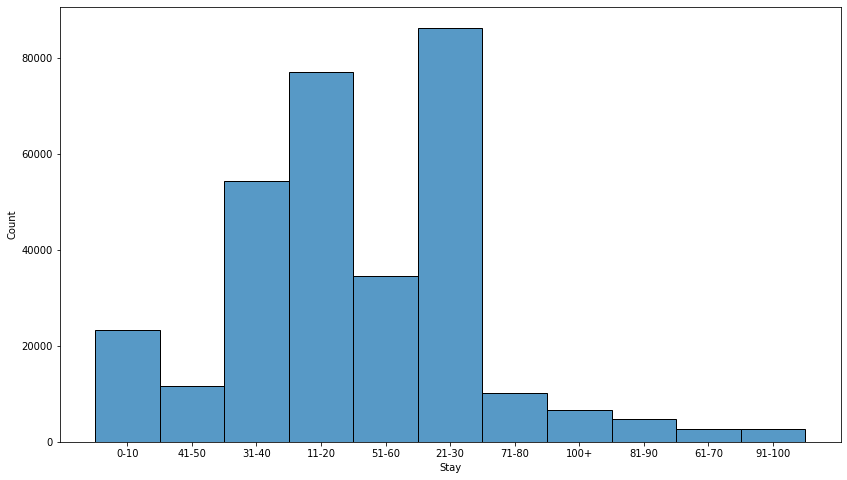

In [82]:
fig, ax = pyplot.subplots(figsize=(14,8))
sns.histplot(data=df, x="Stay")

In [11]:
cat_col = df.select_dtypes(['object']).columns

In [12]:
for i in cat_col:
    print(i,df[i].unique())

Hospital_type_code ['c' 'e' 'b' 'a' 'f' 'd' 'g']
Hospital_region_code ['Z' 'X' 'Y']
Department ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
Ward_Type ['R' 'S' 'Q' 'P' 'T' 'U']
Ward_Facility_Code ['F' 'E' 'D' 'B' 'A' 'C']
Type of Admission ['Emergency' 'Trauma' 'Urgent']
Severity of Illness ['Extreme' 'Moderate' 'Minor']
Age ['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10'
 '91-100']
Stay ['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80' '100+' '81-90'
 '61-70' '91-100']


In [13]:
ages = df["Age"].unique()

In [14]:
ages.sort()

In [15]:
dept_dict = dict(zip(ages, range(len(ages))))
df.Age.replace(dept_dict, inplace=True)

In [16]:
dept_dict

{'0-10': 0,
 '11-20': 1,
 '21-30': 2,
 '31-40': 3,
 '41-50': 4,
 '51-60': 5,
 '61-70': 6,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9}

In [17]:
df.drop(columns = ["case_id", "patientid"], inplace = True)

In [18]:
df.dropna(axis = 0, how = "any", inplace = True)

In [19]:
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,5,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,5,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,5,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,5,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,5,5558.0,41-50


In [20]:
cols = ["Hospital_code", "City_Code_Hospital", "City_Code_Patient" ]

In [21]:
df[cols] = df[cols].astype({"Hospital_code" : "object", "City_Code_Hospital" : "object"
                , "City_Code_Patient" : "object"}, copy = False)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313793 entries, 0 to 318437
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      313793 non-null  object 
 1   Hospital_type_code                 313793 non-null  object 
 2   City_Code_Hospital                 313793 non-null  object 
 3   Hospital_region_code               313793 non-null  object 
 4   Available Extra Rooms in Hospital  313793 non-null  int64  
 5   Department                         313793 non-null  object 
 6   Ward_Type                          313793 non-null  object 
 7   Ward_Facility_Code                 313793 non-null  object 
 8   Bed Grade                          313793 non-null  float64
 9   City_Code_Patient                  313793 non-null  object 
 10  Type of Admission                  313793 non-null  object 
 11  Severity of Illness                3137

In [23]:
cat_col2 = df.select_dtypes(['object']).columns

In [24]:
cat_col2

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
       'Stay'],
      dtype='object')

In [25]:
y = df["Stay"]
X = df.drop(columns = ["Stay"], axis = 1)

In [26]:
cat_col3 = X.select_dtypes(["object"]).columns

In [27]:
X = pd.get_dummies(X, columns = cat_col3)

In [28]:
X.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Age,Admission_Deposit,Hospital_code_1,Hospital_code_2,Hospital_code_3,Hospital_code_4,Hospital_code_5,...,City_Code_Patient_35.0,City_Code_Patient_36.0,City_Code_Patient_37.0,City_Code_Patient_38.0,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate
0,3,2.0,2,5,4911.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2,2.0,2,5,5954.0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2,2.0,2,5,4745.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2,2.0,2,5,7272.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,2,2.0,2,5,5558.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.3, random_state=42)

# Decision Tree Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [194]:
DT_model = DecisionTreeClassifier(random_state = 42)
dt_params = {"min_samples_leaf" : [100,1000,2000],
             "ccp_alpha" : [0, 1, 2, 5, 6]
            }

In [195]:
dt_cv_model = GridSearchCV(DT_model, 
                           dt_params, 
                           n_jobs = -1, 
                           verbose = 1,
                           cv = 5)

In [196]:
dt_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'ccp_alpha': [0, 1, 2, 5, 6],
                         'm

In [197]:
dt_cv_model.best_params_

{'ccp_alpha': 0, 'min_samples_leaf': 100}

## Tuned DT Model

In [198]:
DT_model = DecisionTreeClassifier(random_state = 42,
                                 ccp_alpha = 0,
                                 min_samples_leaf = 100)

In [199]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [200]:
y_pred_dt = DT_model.predict(X_test)

In [201]:
y_pred_dt2 = DT_model.predict(X_train)

**Test Error:**

In [202]:
clf_rep_dt = classification_report(y_test,y_pred_dt, zero_division=1)
print(clf_rep_dt)

              precision    recall  f1-score   support

        0-10       0.37      0.17      0.23      7029
        100+       0.52      0.42      0.46      1967
       11-20       0.40      0.48      0.44     23158
       21-30       0.42      0.62      0.50     25766
       31-40       0.39      0.23      0.29     16291
       41-50       1.00      0.00      0.00      3478
       51-60       0.40      0.48      0.44     10435
       61-70       1.00      0.00      0.00       835
       71-80       0.25      0.02      0.04      3003
       81-90       0.32      0.21      0.25      1387
      91-100       1.00      0.00      0.00       789

    accuracy                           0.41     94138
   macro avg       0.55      0.24      0.24     94138
weighted avg       0.43      0.41      0.38     94138



**Train Error:**

In [203]:
clf_rep_dt2 = classification_report(y_train,y_pred_dt2, zero_division=1)
print(clf_rep_dt2)

              precision    recall  f1-score   support

        0-10       0.38      0.18      0.24     16221
        100+       0.52      0.41      0.46      4581
       11-20       0.43      0.52      0.47     53937
       21-30       0.44      0.66      0.53     60550
       31-40       0.43      0.25      0.32     38021
       41-50       1.00      0.00      0.00      8063
       51-60       0.42      0.50      0.46     24028
       61-70       1.00      0.00      0.00      1863
       71-80       0.29      0.03      0.05      7093
       81-90       0.38      0.24      0.29      3374
      91-100       1.00      0.00      0.00      1924

    accuracy                           0.43    219655
   macro avg       0.57      0.25      0.26    219655
weighted avg       0.46      0.43      0.40    219655



# Random Forest 

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model = RandomForestClassifier(n_estimators = 500, 
                                 min_samples_leaf = 100,
                                 n_jobs = -1,
                                 random_state = 42
                                 )

In [38]:
rf_params = {"max_features" : [50, 100]}

In [39]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           n_jobs = -1, 
                           verbose = 1,
                           cv = 5)

In [41]:
rf_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 49.8min remaining: 33.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 58.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=100,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                  

In [42]:
rf_cv_model.best_params_

{'max_features': 50}

## Tuned RF Model

In [43]:
rf_model = RandomForestClassifier(n_estimators = 500, 
                                 min_samples_leaf = 100,
                                 n_jobs = -1,
                                 random_state = 42,
                                 max_features = 50
                                 )

In [44]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=50,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [45]:
y_pred_rf = rf_model.predict(X_test)

In [46]:
y_pred_rf2 = rf_model.predict(X_train)

**Test Error:**

In [47]:
clf_rep_rf = classification_report(y_test,y_pred_rf, zero_division=1)
print(clf_rep_rf)

              precision    recall  f1-score   support

        0-10       0.42      0.13      0.20      7029
        100+       0.51      0.43      0.46      1967
       11-20       0.42      0.52      0.46     23158
       21-30       0.42      0.65      0.51     25766
       31-40       0.43      0.24      0.31     16291
       41-50       1.00      0.00      0.00      3478
       51-60       0.41      0.50      0.45     10435
       61-70       1.00      0.00      0.00       835
       71-80       1.00      0.00      0.00      3003
       81-90       0.36      0.11      0.17      1387
      91-100       1.00      0.00      0.00       789

    accuracy                           0.42     94138
   macro avg       0.63      0.23      0.23     94138
weighted avg       0.47      0.42      0.38     94138



**Train Error:**

In [49]:
clf_rep_rf2 = classification_report(y_train,y_pred_rf2, zero_division=1)
print(clf_rep_rf2)

              precision    recall  f1-score   support

        0-10       0.42      0.13      0.20     16221
        100+       0.51      0.43      0.47      4581
       11-20       0.43      0.53      0.48     53937
       21-30       0.44      0.67      0.53     60550
       31-40       0.45      0.24      0.32     38021
       41-50       1.00      0.00      0.00      8063
       51-60       0.41      0.51      0.46     24028
       61-70       1.00      0.00      0.00      1863
       71-80       1.00      0.00      0.00      7093
       81-90       0.43      0.14      0.21      3374
      91-100       1.00      0.00      0.00      1924

    accuracy                           0.43    219655
   macro avg       0.65      0.24      0.24    219655
weighted avg       0.48      0.43      0.40    219655



# XGB Model

In [50]:
from xgboost import XGBClassifier

In [54]:
xgb_model = XGBClassifier(verbosity = 1,
                         min_child_weight = 10,
                          eta = 0.1,
                          max_depth = 3
                         
                         )

In [52]:
xgb_params = {"eta" : [0.1, 1],
             "max_depth" : [3,6],
             "n_estimators" : [100, 500]}

In [53]:
xgb_cv_model = GridSearchCV(xgb_model, 
                           xgb_params, 
                           n_jobs = -1, 
                           verbose = 1,
                           cv = 5)

In [ ]:
xgb_cv_model.fit(X_train, y)

In [55]:
xgb_model.fit(X_train, y_train)

C:\Users\Muhammed\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=1)

In [58]:
y_pred_xgb = xgb_model.predict(X_test)

In [60]:
y_pred_xgb2 = xgb_model.predict(X_train)

**Test Error:**

In [59]:
clf_rep_xgb = classification_report(y_test,y_pred_xgb, zero_division=1)
print(clf_rep_xgb)

              precision    recall  f1-score   support

        0-10       0.45      0.10      0.16      7029
        100+       0.51      0.42      0.46      1967
       11-20       0.41      0.49      0.45     23158
       21-30       0.42      0.68      0.52     25766
       31-40       0.42      0.13      0.20     16291
       41-50       1.00      0.00      0.00      3478
       51-60       0.38      0.59      0.46     10435
       61-70       1.00      0.00      0.00       835
       71-80       0.33      0.00      0.00      3003
       81-90       0.29      0.13      0.18      1387
      91-100       1.00      0.00      0.00       789

    accuracy                           0.41     94138
   macro avg       0.56      0.23      0.22     94138
weighted avg       0.44      0.41      0.36     94138



**Train Error:**

In [61]:
clf_rep_xgb2 = classification_report(y_train,y_pred_xgb2, zero_division=1)
print(clf_rep_xgb2)

              precision    recall  f1-score   support

        0-10       0.44      0.09      0.15     16221
        100+       0.51      0.41      0.45      4581
       11-20       0.41      0.49      0.45     53937
       21-30       0.42      0.68      0.52     60550
       31-40       0.43      0.13      0.20     38021
       41-50       1.00      0.00      0.00      8063
       51-60       0.38      0.59      0.46     24028
       61-70       1.00      0.00      0.00      1863
       71-80       0.50      0.00      0.00      7093
       81-90       0.32      0.15      0.21      3374
      91-100       1.00      0.00      0.00      1924

    accuracy                           0.41    219655
   macro avg       0.58      0.23      0.22    219655
weighted avg       0.45      0.41      0.36    219655



# LGBM Model

In [62]:
from lightgbm import LGBMClassifier

In [67]:
lgbm_model = LGBMClassifier(min_child_weight = 10,
                            random_state = 42,
                            )

In [71]:
lgbm_params = {"learning_rate" : [0.1, 1],
              "max_depth" : [1,5],
              "n_estimators" : [100, 500]}

In [72]:
lgbm_cv_model = GridSearchCV(lgbm_model, 
                           lgbm_params, 
                           n_jobs = -1, 
                           verbose = 1,
                           cv = 2)

In [73]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  6.6min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20, min_child_weight=10,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=42, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [1, 5],
                         'n_estimators': [100, 500]},
            

In [74]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

## Tuned LGBM Model

In [75]:
lgbm_model = LGBMClassifier(min_child_weight = 10,
                            random_state = 42,
                            learning_rate = 0.1,
                            max_depth = 5,
                            n_estimators =  100
                            )

In [76]:
lgbm_model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=5,
               min_child_samples=20, min_child_weight=10, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [77]:
y_pred_lgbm = lgbm_model.predict(X_test)

In [78]:
y_pred_lgbm2 = lgbm_model.predict(X_train)

**Test Error:**

In [79]:
clf_rep_lgbm = classification_report(y_test,y_pred_lgbm, zero_division=1)
print(clf_rep_lgbm)

              precision    recall  f1-score   support

        0-10       0.42      0.14      0.21      7029
        100+       0.54      0.42      0.47      1967
       11-20       0.43      0.51      0.46     23158
       21-30       0.43      0.67      0.52     25766
       31-40       0.43      0.22      0.29     16291
       41-50       0.25      0.00      0.00      3478
       51-60       0.41      0.51      0.46     10435
       61-70       1.00      0.00      0.00       835
       71-80       0.31      0.02      0.03      3003
       81-90       0.34      0.21      0.26      1387
      91-100       0.37      0.01      0.03       789

    accuracy                           0.43     94138
   macro avg       0.45      0.25      0.25     94138
weighted avg       0.42      0.43      0.39     94138



**Train Error:**

In [80]:
clf_rep_lgbm2 = classification_report(y_train,y_pred_lgbm2, zero_division=1)
print(clf_rep_lgbm2)

              precision    recall  f1-score   support

        0-10       0.44      0.15      0.22     16221
        100+       0.56      0.44      0.49      4581
       11-20       0.44      0.51      0.47     53937
       21-30       0.43      0.68      0.53     60550
       31-40       0.45      0.22      0.30     38021
       41-50       0.58      0.00      0.00      8063
       51-60       0.42      0.53      0.47     24028
       61-70       0.50      0.00      0.00      1863
       71-80       0.50      0.03      0.05      7093
       81-90       0.44      0.28      0.34      3374
      91-100       0.51      0.02      0.04      1924

    accuracy                           0.44    219655
   macro avg       0.48      0.26      0.27    219655
weighted avg       0.45      0.44      0.40    219655



# Results

Algorithm  | Train Accuracy | Test Accuracy 
------------- | ------------- | ------------- 
Decision Tree  | 0.42 | 0.41 
Random Forest  | 0.43 | 0.42 
XGB Classifier  | 0.41 | 0.41 
LGBM Classifier  | 0.44 | 0.43 


According to accuracy scores both train and test data, seems like there is no overfitting situation. I cannot cross validate XGB model because of my processing power, it takes too much time so I tried to Light GBM model. LGBM works better than the others, it has highest test accuracy score and test and train scores close to each other. There are lots of categorical features in dataset, almost no numerical features, probably this dataset does not have enough information for this task.

#BoğaziçiAblukada
#BoğaziçiSusmayacak
#AşağıBakmayacağız